# Exemplo de Tratamento de Base de Dados

### Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import requests
from bs4 import BeautifulSoup

### Web Scraping de dados de Fluxo de Capital Estrangeiro na B3

##### Mostrando que o pandas já faz isso

In [5]:
pd.read_html("https://www.dadosdemercado.com.br/bolsa/investidores-estrangeiros")[0].head()

,Data,Fluxo
0,01/02/2023,"-12.158,55 mi"
1,31/01/2023,"1.355,06 mi"
2,30/01/2023,"295,44 mi"
3,27/01/2023,"976,07 mi"
4,26/01/2023,"1.048,92 mi"


##### Usando bs4

In [17]:
html = requests.get("https://www.dadosdemercado.com.br/bolsa/investidores-estrangeiros")
soup = BeautifulSoup(html.text, "html.parser")
html_tabela = soup.find_all("table")[0]

In [18]:
def ConverteTabelaHTML(tabela): # converte tabela HTML bs4 em numérico       
    """
    Converte uma tag <table> do HTML (sendo objeto oriundo do BeautifulSoup) em uma matriz que pode ser convertida em DataFrame.
    A função separa o HTML de cada linha <tr> em uma lista, e depois separa os dígitos contidos em cada linha <td> em outra lista.
    Ela também separa a primeira linha <tr> e os dígitos contidos nela <th> como cabeçalho.
    """
    
    rows = []
    table_rows = tabela.find_all('tr') # separa o HTML de cada linha (table row) numa lista
    
    header_row = [td.get_text(strip = True) for td in table_rows[0].find_all('th')] # primeira linha deve conter tags <th> (table headers) com tags <td> dentro (table digits)
    
    if header_row: # retorna True se a lista não está vazia
        rows.append(header_row) # primeira linha é o cabeçalho, se ele existir
        table_rows = table_rows[1:]
        
    for row in table_rows: # para cada linha da lista
        rows.append([num.get_text(strip=True) for num in row.find_all('td')]) # separa o valor contido nas tags <td> (table digits)
    
    return rows

In [33]:
tabela = ConverteTabelaHTML(html_tabela)
df = pd.DataFrame(tabela[1:], columns = tabela[0])
df.head()

,Data,Fluxo
0,01/02/2023,"-12.158,55 mi"
1,31/01/2023,"1.355,06 mi"
2,30/01/2023,"295,44 mi"
3,27/01/2023,"976,07 mi"
4,26/01/2023,"1.048,92 mi"


### Tratamento da base

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    321 non-null    object
 1   Fluxo   321 non-null    object
dtypes: object(2)
memory usage: 5.1+ KB


In [23]:
df.describe()

,Data,Fluxo
count,321,321
unique,321,321
top,13/04/2022,"275,61 mi"
freq,1,1


In [25]:
df.head()

,Data,Fluxo
0,01/02/2023,"-12.158,55 mi"
1,31/01/2023,"1.355,06 mi"
2,30/01/2023,"295,44 mi"
3,27/01/2023,"976,07 mi"
4,26/01/2023,"1.048,92 mi"


In [34]:
df["Data"] = pd.to_datetime(df["Data"], format= "%d/%m/%Y")
df.set_index("Data", inplace = True)

In [36]:
df.head()

,Fluxo
Data,
2023-02-01,"-12.158,55 mi"
2023-01-31,"1.355,06 mi"
2023-01-30,"295,44 mi"
2023-01-27,"976,07 mi"
2023-01-26,"1.048,92 mi"


In [47]:
fluxo = []
for linha in df["Fluxo"]:
    corr_num = linha[:-3]
    corr_ponto = corr_num.replace(".", "")
    corr_virgula = corr_ponto.replace(",", ".")
    fluxo.append(corr_virgula)
    
df["Fluxo"] = fluxo
df["Fluxo"] = df["Fluxo"].astype("float64")

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 321 entries, 2023-02-01 to 2021-10-20
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fluxo   321 non-null    float64
dtypes: float64(1)
memory usage: 5.0 KB


### Visualização simples

<AxesSubplot:xlabel='Data'>

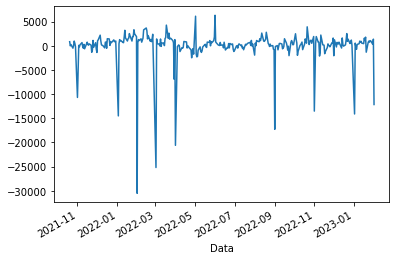

In [51]:
df["Fluxo"].plot()